In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
data_types = {
    'PD_DESC': 'category',
    'OFNS_DESC': 'category',
    'LAW_CODE': 'category',
    'LAW_CAT_CD': 'category',
    'ARREST_BORO': 'category',
    'ARREST_PRECINCT': 'category',
    'JURISDICTION_CODE': 'category',
    'AGE_GROUP': 'category',
    'PERP_SEX': 'category',
    'PERP_RACE': 'category'
}

df = pd.read_csv('NYPD_arrest_data_2022-2023.csv', dtype=data_types)

In [3]:
df.head()

,ARREST_DATE,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Lon_Lat
0,2022-10-16,CRIMINAL MIS 2 & 3,121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,Felony,Brooklyn,76,2.0,25-44,Male,BLACK,40.676869,-74.006640,POINT (-74.00664 40.676869)
1,2022-04-12,"CONTROLLED SUBSTANCE,INTENT TO",117.0,DANGEROUS DRUGS,PL 2201602,Felony,Manhattan,14,0.0,18-24,Male,BLACK,40.753533,-73.994537,POINT (-73.9945368920152 40.7535327012632)
2,2022-03-19,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,Misdemeanor,Brooklyn,60,0.0,25-44,Male,WHITE,40.582620,-73.986223,POINT (-73.986223 40.58262)
3,2022-08-24,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553001,Felony,Brooklyn,84,0.0,18-24,Male,WHITE HISPANIC,40.690115,-73.989019,POINT (-73.989019 40.690115)
4,2022-01-07,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306501,Felony,Manhattan,24,2.0,25-44,Male,BLACK,40.796074,-73.967067,POINT (-73.9670667458109 40.7960743128304)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412713 entries, 0 to 412712
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   ARREST_DATE        412713 non-null  object  
 1   PD_DESC            412713 non-null  category
 2   KY_CD              412713 non-null  float64 
 3   OFNS_DESC          412713 non-null  category
 4   LAW_CODE           412713 non-null  category
 5   LAW_CAT_CD         412713 non-null  category
 6   ARREST_BORO        412713 non-null  category
 7   ARREST_PRECINCT    412713 non-null  category
 8   JURISDICTION_CODE  412713 non-null  category
 9   AGE_GROUP          412713 non-null  category
 10  PERP_SEX           412713 non-null  category
 11  PERP_RACE          412713 non-null  category
 12  Latitude           412713 non-null  float64 
 13  Longitude          412713 non-null  float64 
 14  Lon_Lat            412713 non-null  object  
dtypes: category(10), float64(3), objec

In [5]:
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])

In [6]:
df['ARREST_MONTH'] = df['ARREST_DATE'].dt.month
unique_months = df['ARREST_MONTH'].unique()
unique_months.sort()
print("Unique months listed in the ARREST_DATE column:")
print(unique_months)


Unique months listed in the ARREST_DATE column:
[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [7]:
df['LAW_CAT_CD'].unique()

['Felony', 'Misdemeanor', 'Violation', 'Traffic', 'Unclassified Violation']
Categories (5, object): ['Felony', 'Misdemeanor', 'Traffic', 'Violation', 'Unclassified Violation']

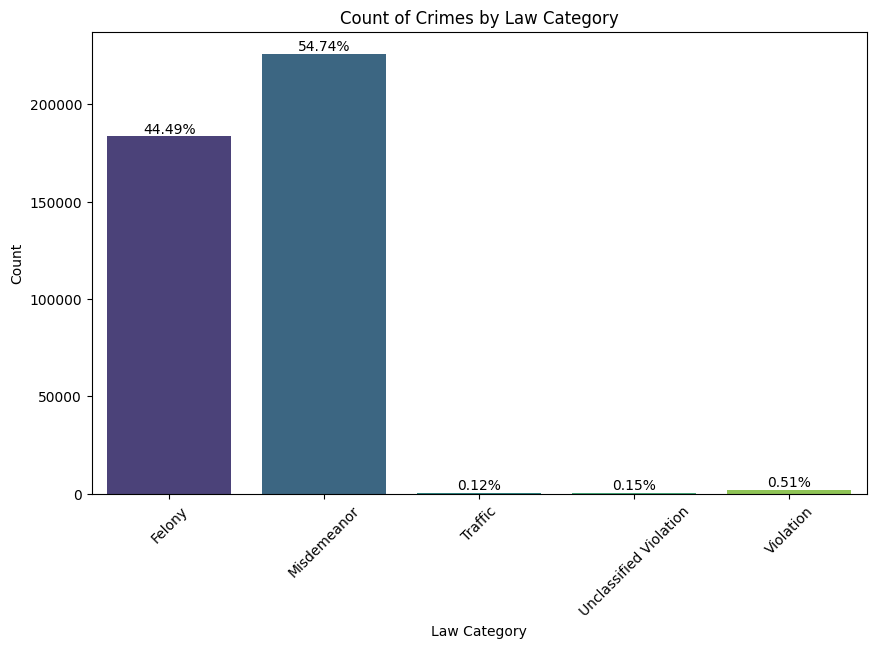

In [17]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='LAW_CAT_CD', order=law_cat_order, palette='viridis')
total_count = df.shape[0]
for p in ax.patches:
    percentage = (p.get_height() / total_count) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Count of Crimes by Law Category')
plt.xlabel('Law Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


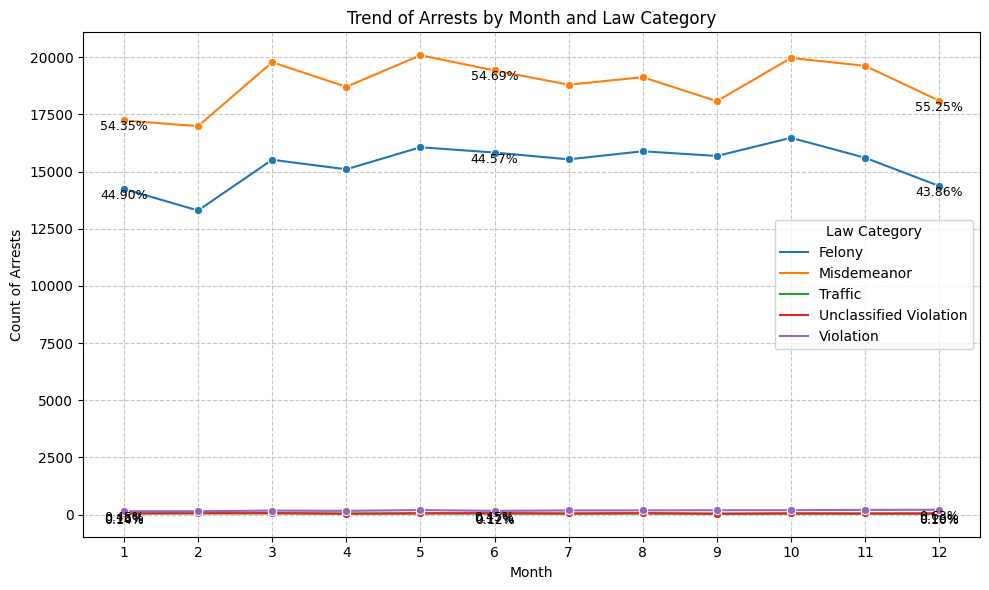

In [8]:
agg_df = df.groupby(['ARREST_MONTH', 'LAW_CAT_CD']).size().reset_index(name='count')
law_cat_order = ['Felony', 'Misdemeanor', 'Traffic', 'Unclassified Violation', 'Violation']
plt.figure(figsize=(10, 6))
sns.lineplot(data=agg_df, x='ARREST_MONTH', y='count', hue='LAW_CAT_CD', hue_order=law_cat_order, marker='o')
plt.title('Trend of Arrests by Month and Law Category')
plt.xlabel('Month')
plt.ylabel('Count of Arrests')
plt.xticks(unique_months)  # Set x-axis ticks to match the selected months
plt.legend(title='Law Category')
total_counts = agg_df.groupby('ARREST_MONTH')['count'].sum()
months_of_interest = [1, 6, 12]
for month in months_of_interest:
    total_count = total_counts.loc[month]
    subset_df = agg_df[agg_df['ARREST_MONTH'] == month]
    for _, row in subset_df.iterrows():
        percentage = (row['count'] / total_count) * 100
        plt.text(row['ARREST_MONTH'], row['count'], f'{percentage:.2f}%', ha='center', va='top', fontsize=9)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Arrests by Borough

### Bronx

# NEEDS TO BE FIXED, PERCENTAGES ARE REFLECTED OF THE POINT IN THE Y AXES AS OPPOSED TO TOTAL IN LINE GRAPH ON X AXIS

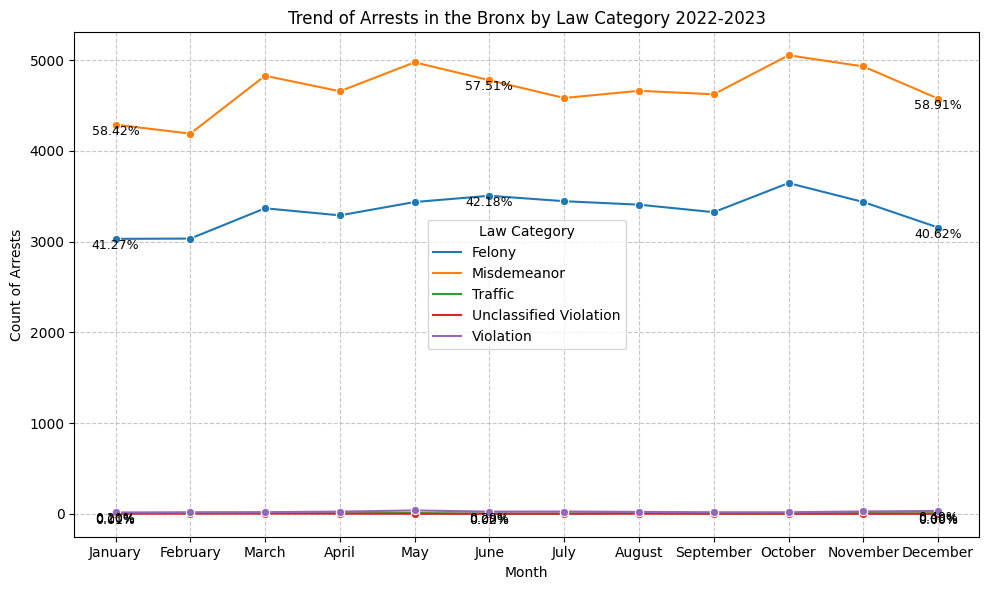

In [21]:
df['ARREST_MONTH'] = df['ARREST_DATE'].dt.month
bronx_df = df[df['ARREST_BORO'] == 'Bronx']
agg_df = bronx_df.groupby(['ARREST_MONTH', 'LAW_CAT_CD']).size().reset_index(name='count')
law_cat_order = ['Felony', 'Misdemeanor', 'Traffic', 'Unclassified Violation', 'Violation']
total_counts = agg_df.groupby('ARREST_MONTH')['count'].sum()
months = range(1, 13)
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(10, 6))
sns.lineplot(data=agg_df, x='ARREST_MONTH', y='count', hue='LAW_CAT_CD', hue_order=law_cat_order, marker='o')
months_of_interest = [1, 6, 12] 
for month in months_of_interest:
    total_count = total_counts.loc[month]
    subset_df = agg_df[agg_df['ARREST_MONTH'] == month]
    for _, row in subset_df.iterrows():
        percentage = (row['count'] / total_count) * 100
        plt.text(row['ARREST_MONTH'], row['count'], f'{percentage:.2f}%', ha='center', va='top', fontsize=9)
plt.title('Trend of Arrests in the Bronx by Law Category 2022-2023')
plt.xlabel('Month')
plt.ylabel('Count of Arrests')
plt.xticks(months, month_names)
plt.legend(title='Law Category')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


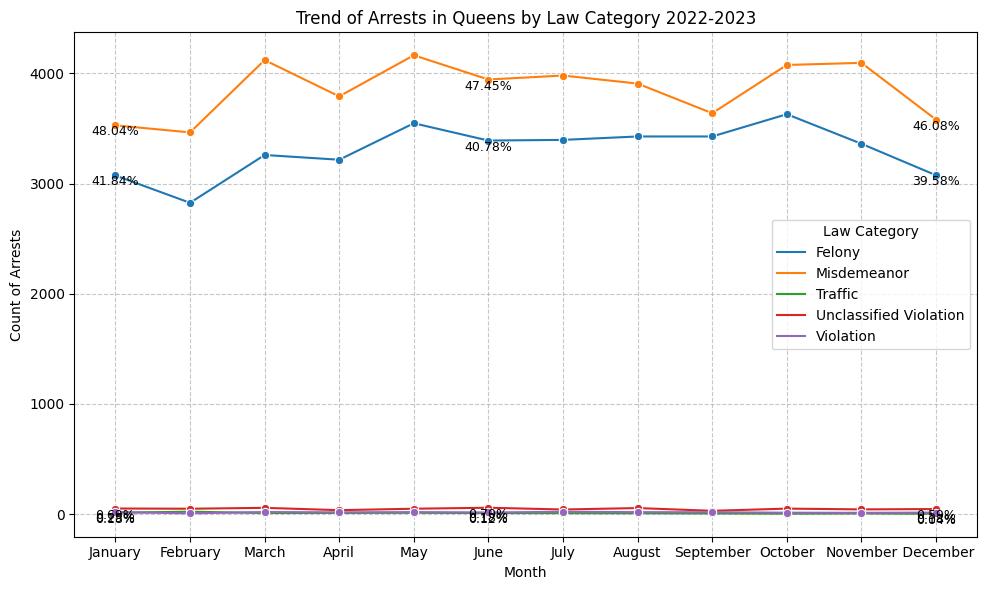

In [22]:
bronx_df = df[df['ARREST_BORO'] == 'Queens']
agg_df = bronx_df.groupby(['ARREST_MONTH', 'LAW_CAT_CD']).size().reset_index(name='count')
law_cat_order = ['Felony', 'Misdemeanor', 'Traffic', 'Unclassified Violation', 'Violation']
months = range(1,13)
month_names = ['January', 'February', 'March', 'April', 'May','June','July','August','September','October','November',' December']
plt.figure(figsize=(10, 6))
sns.lineplot(data=agg_df, x='ARREST_MONTH', y='count', hue='LAW_CAT_CD', hue_order=law_cat_order, marker='o')

month_of_interest= [1,6,12]
for month in months_of_interest:
    total_count = total_counts.loc[month]
    subset_df = agg_df[agg_df['ARREST_MONTH'] == month]
    for _, row in subset_df.iterrows():
        percentage = (row['count'] / total_count) * 100
        plt.text(row['ARREST_MONTH'], row['count'], f'{percentage:.2f}%', ha='center', va='top', fontsize=9)

plt.title('Trend of Arrests in Queens by Law Category 2022-2023')
plt.xlabel('Month')
plt.ylabel('Count of Arrests')
plt.xticks(months,month_names) 
plt.legend(title='Law Category')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


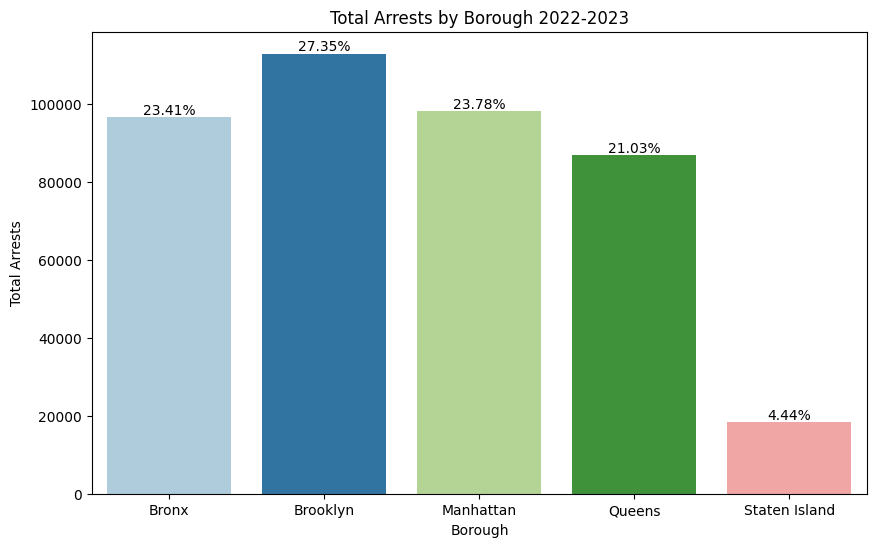

In [23]:
arrests_by_borough = df.groupby('ARREST_BORO').size().reset_index(name='Total_Arrests')
plt.figure(figsize=(10,6))
total_count = arrests_by_borough['Total_Arrests'].sum()
ax = sns.barplot(data= arrests_by_borough, x='ARREST_BORO', y='Total_Arrests',palette='Paired')
for p in ax.patches:
    percentage = (p.get_height() / total_count) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')


plt.title('Total Arrests by Borough 2022-2023')
plt.xlabel('Borough')
plt.ylabel('Total Arrests')
plt.show()

### Geospatial Plotting

#### Felonies

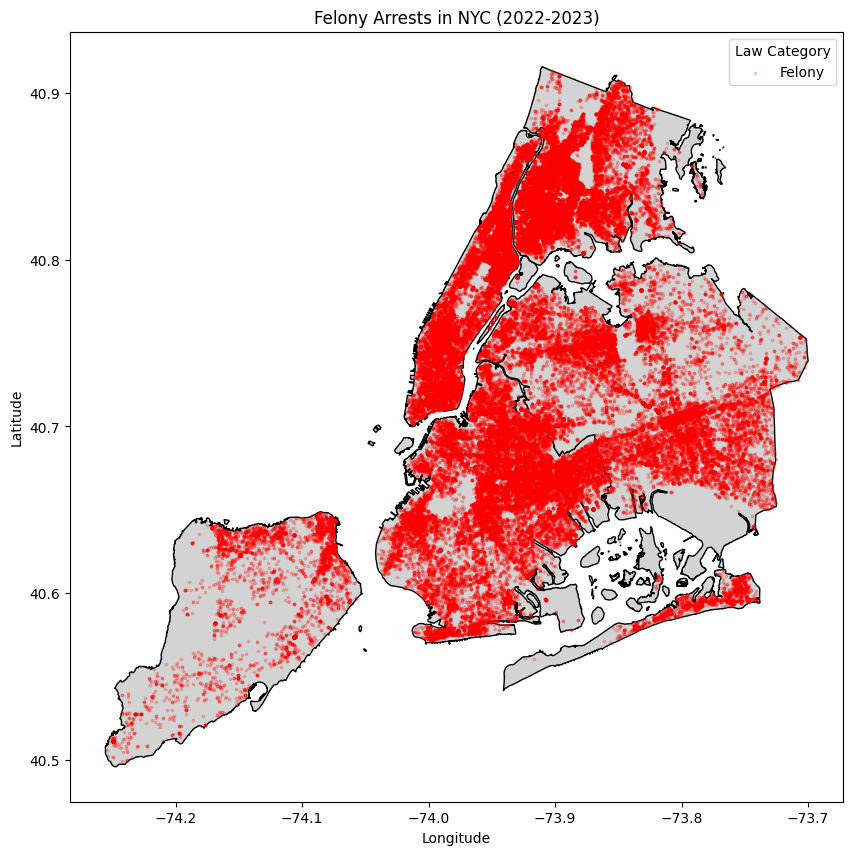

In [14]:
gdf_arrests = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

gdf_arrests.set_crs(epsg=4326, inplace=True)
gdf_felonies = gdf_arrests[gdf_arrests['LAW_CAT_CD'] == 'Felony']
gdf_nyc = gpd.read_file("Borough Boundaries.zip")
gdf_nyc = gdf_nyc.to_crs(epsg=4326)
fig, ax = plt.subplots(figsize=(14, 10))
gdf_nyc.plot(ax=ax, color='lightgrey', edgecolor='black')
gdf_felonies.plot(ax=ax, markersize=3, alpha=0.2, color='red', label='Felony')
plt.title('Felony Arrests in NYC (2022-2023)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Law Category')

# Show plot
plt.savefig('2022-2023 Felony GeoSpatial Plotting')
plt.show()


#### Misdomeanor

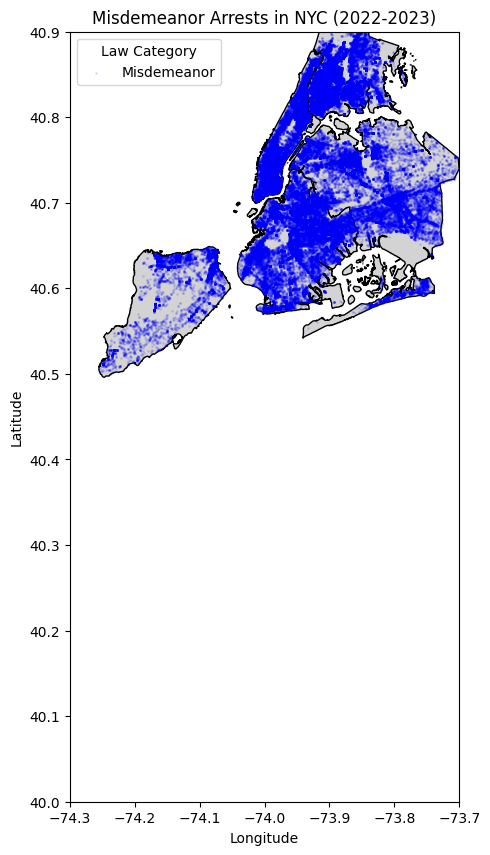

In [28]:
gdf_arrests = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude'])
)
gdf_arrests.set_crs(epsg=4326, inplace=True)
def plot_arrests_by_category(category, color, title, filename):
    gdf_category = gdf_arrests[gdf_arrests['LAW_CAT_CD'] == category]
    
    # Needed to filter as the displayed Geomap was too small but still cutting off Manhattan
    gdf_category = gdf_category[
        (gdf_category['Longitude'] >= -74.3) & 
        (gdf_category['Longitude'] <= -73.7) & 
        (gdf_category['Latitude'] >= 40) & 
        (gdf_category['Latitude'] <= 41)
    ]
    gdf_nyc = gpd.read_file("Borough Boundaries.zip")
    gdf_nyc = gdf_nyc.to_crs(epsg=4326)
    fig, ax = plt.subplots(figsize=(14, 10))
    gdf_nyc.plot(ax=ax, color='lightgrey', edgecolor='black')
    gdf_category.plot(ax=ax, markersize=1, alpha=0.1, color=color, label=category)
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.xlim(-74.3, -73.7)
    plt.ylim(40, 40.9)
    plt.legend(title='Law Category')
    plt.show()
plot_arrests_by_category('Misdemeanor', 'blue', 'Misdemeanor Arrests in NYC (2022-2023)',filename='Borough Boundaries.zip')


### Sex

#### Felonies/Misdemeanors Committed by Perp Sex

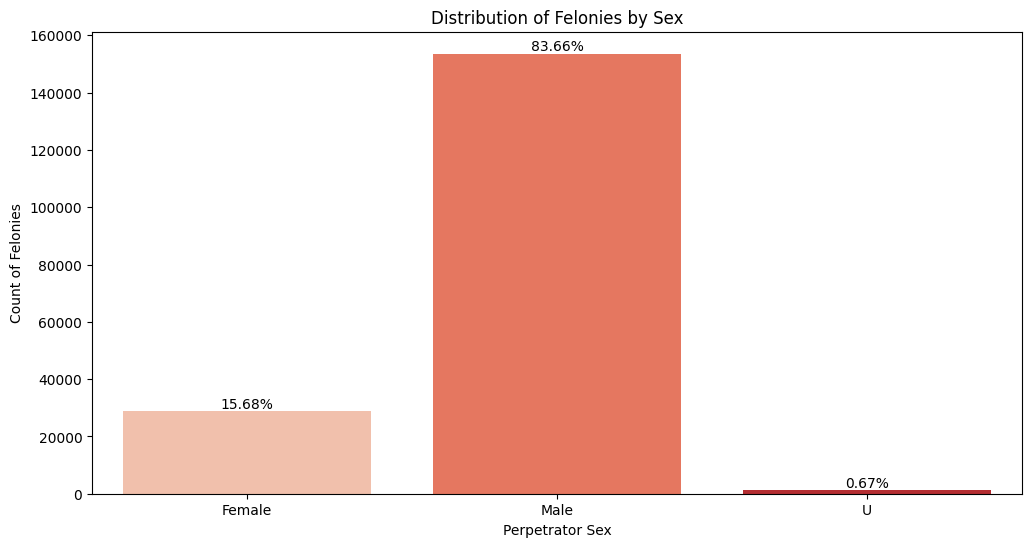

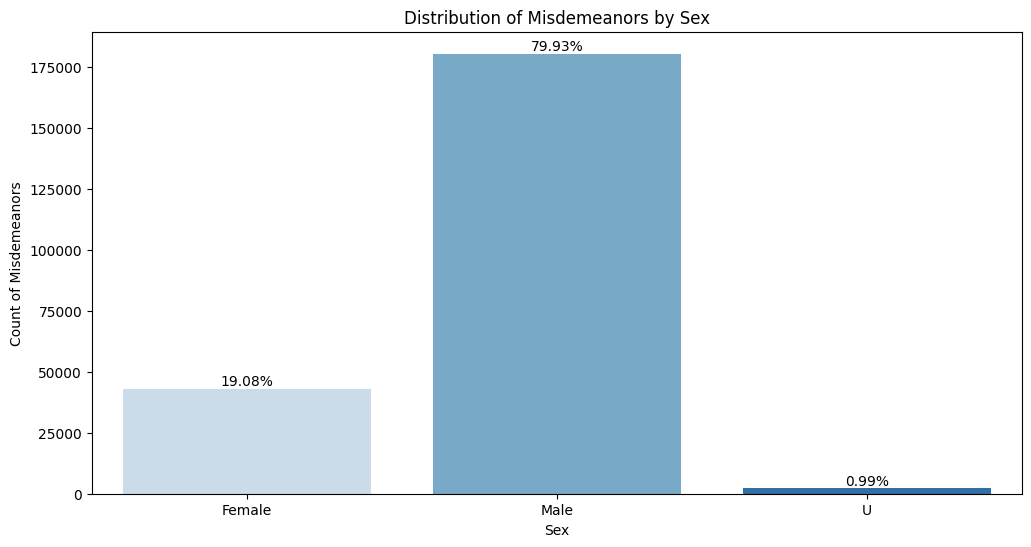

In [31]:
felonies = df[df['LAW_CAT_CD'] == 'Felony']
misdemeanors = df[df['LAW_CAT_CD'] == 'Misdemeanor']

def add_annotations(ax, total_count):
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_count) * 100
        ax.annotate(f'{percentage:.2f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

# Felonies
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=felonies, x='PERP_SEX', palette='Reds')
total_felonies = len(felonies)
add_annotations(ax, total_felonies)
plt.title('Distribution of Felonies by Sex')
plt.xlabel('Perpetrator Sex')
plt.ylabel('Count of Felonies')
plt.show()


#Misdemeanor
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=misdemeanors, x='PERP_SEX', palette='Blues')
total_misdemeanors = len(misdemeanors)
add_annotations(ax, total_misdemeanors)
plt.title('Distribution of Misdemeanors by Sex')
plt.xlabel('Sex')
plt.ylabel('Count of Misdemeanors')
plt.show()


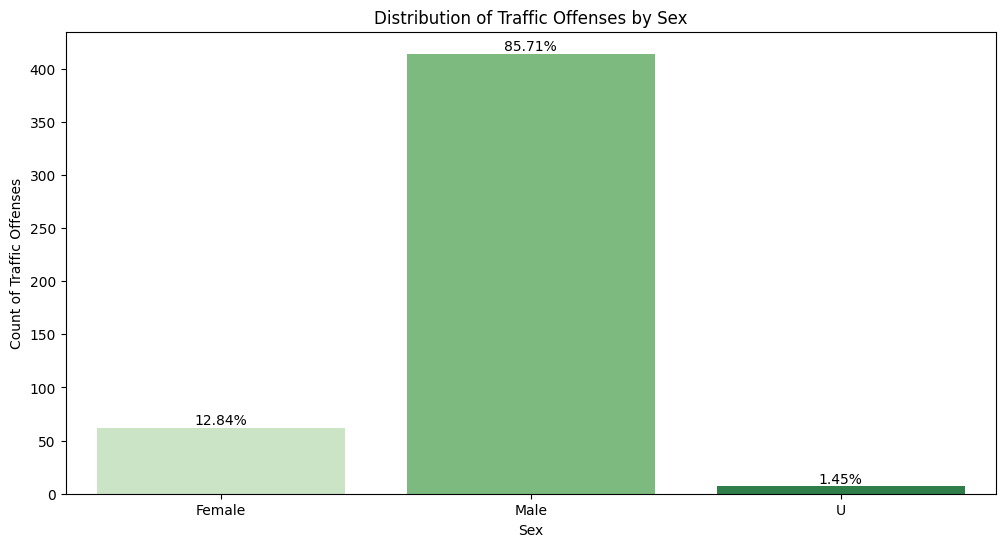

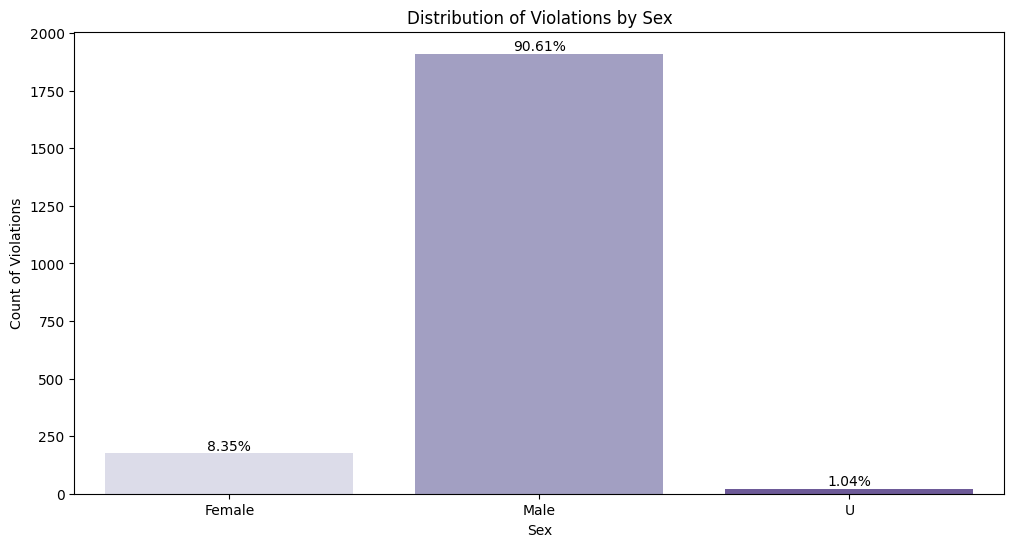

In [33]:
traffic = df[df['LAW_CAT_CD'] == 'Traffic']
violations = df[df['LAW_CAT_CD'] == 'Violation']

def add_annotations(ax, total_count):
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_count) * 100
        ax.annotate(f'{percentage:.2f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

# Traffic
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=traffic, x='PERP_SEX', palette='Greens')
total_traffic = len(traffic)
add_annotations(ax, total_traffic)
plt.title('Distribution of Traffic Offenses by Sex')
plt.xlabel('Sex')
plt.ylabel('Count of Traffic Offenses')
plt.show()

# Volation
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=violations, x='PERP_SEX', palette='Purples')
total_violations = len(violations)
add_annotations(ax, total_violations)
plt.title('Distribution of Violations by Sex')
plt.xlabel('Sex')
plt.ylabel('Count of Violations')
plt.show()



In [ ]:
sex_count = df['PERP_SEX'].value_counts()
sex_ratio = sex_count['Male']/sex_count['Female']
print(f"Male to Female Arrest Ratio: {sex_ratio:.2f}")

Male to Female Arrest Ratio: 4.67


#### Age Group

In [35]:
df[['AGE_GROUP']].describe()

,AGE_GROUP
count,412713
unique,5
top,25-44
freq,237328


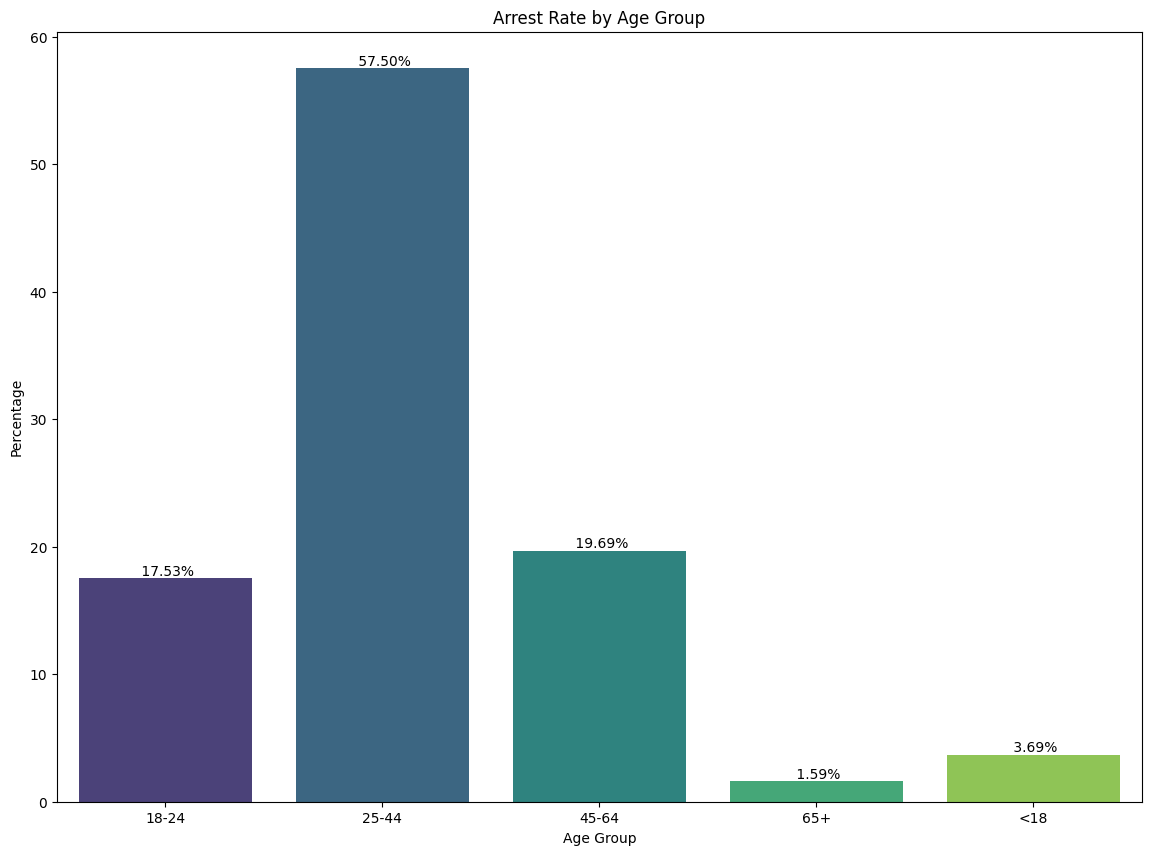

In [36]:
age_group_counts = df['AGE_GROUP'].value_counts(normalize=True)*100
age_group_counts
plt.figure(figsize=(14,10))
ax = sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette = 'viridis')
ax.set_ylabel('Percentage')
ax.set_xlabel('Age Group')
ax.set_title('Arrest Rate by Age Group')
for p in ax.patches:
    ax.annotate(f'{p.get_height(): .2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va= 'center', fontsize= 10, color = 'black',
                xytext= (0,5), textcoords = 'offset points')

plt.show()

Its important to take a look into what kind of crimes are bieng committed within respective age groups, as I have strong incliniation to believe that indviduals from 45-65+ are being arrested for traffic/violations

In [48]:
age_group_18_24_df = df[df['AGE_GROUP'] == '18-24']
agg_df = age_group_18_24_df['LAW_CAT_CD'].value_counts().reset_index()
agg_df

,index,LAW_CAT_CD
0,Misdemeanor,36774
1,Felony,35072
2,Violation,325
3,Unclassified Violation,85
4,Traffic,84


#### Felonies

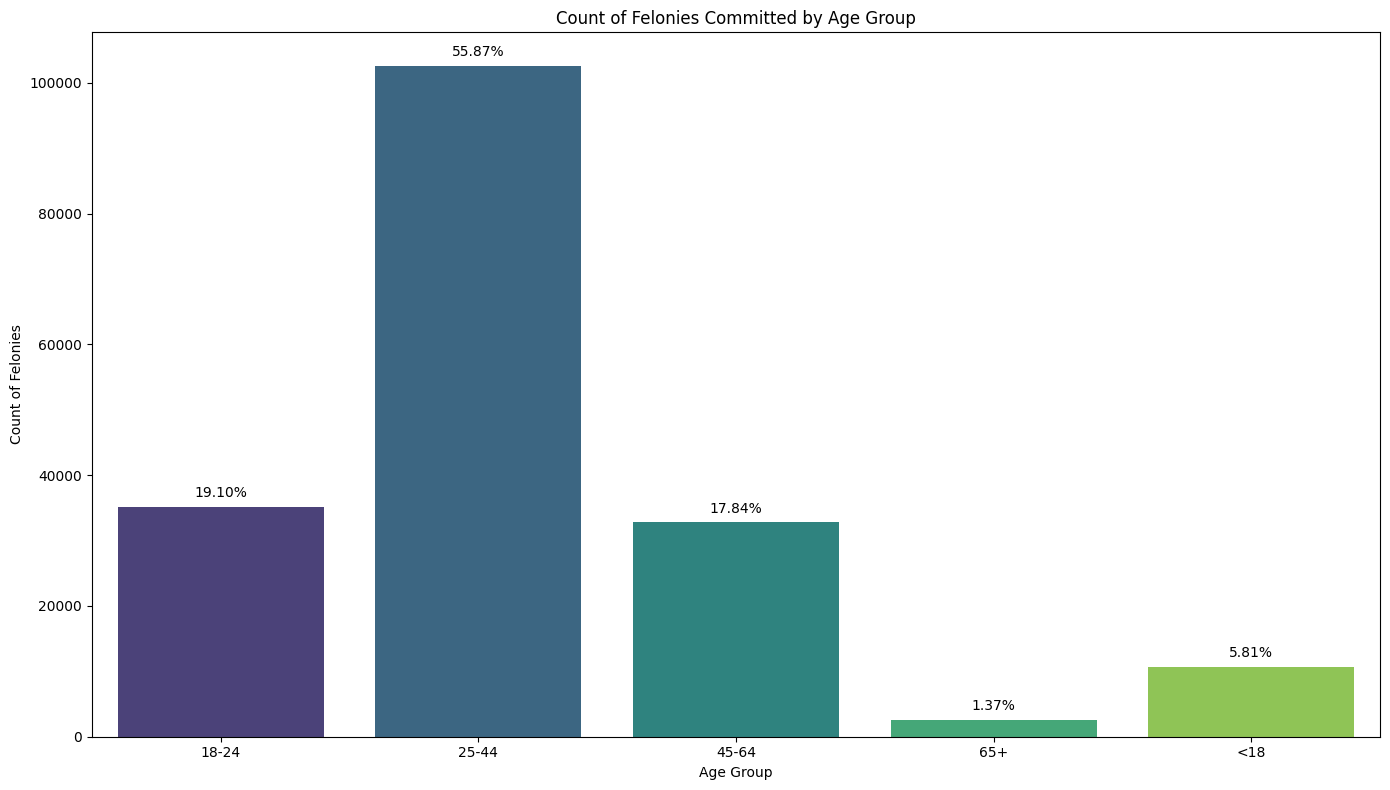

In [64]:
felony_df = df[df['LAW_CAT_CD'] == 'Felony']
agg_df = felony_df['AGE_GROUP'].value_counts().reset_index()
agg_df.columns = ['AGE_GROUP', 'count']
agg_df = agg_df.sort_values(by='AGE_GROUP')
total_felonies = agg_df['count'].sum()
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=agg_df, x='AGE_GROUP', y='count', palette='viridis')
ax.set_title('Count of Felonies Committed by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Count of Felonies')
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_felonies) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()


### Misdemeanor

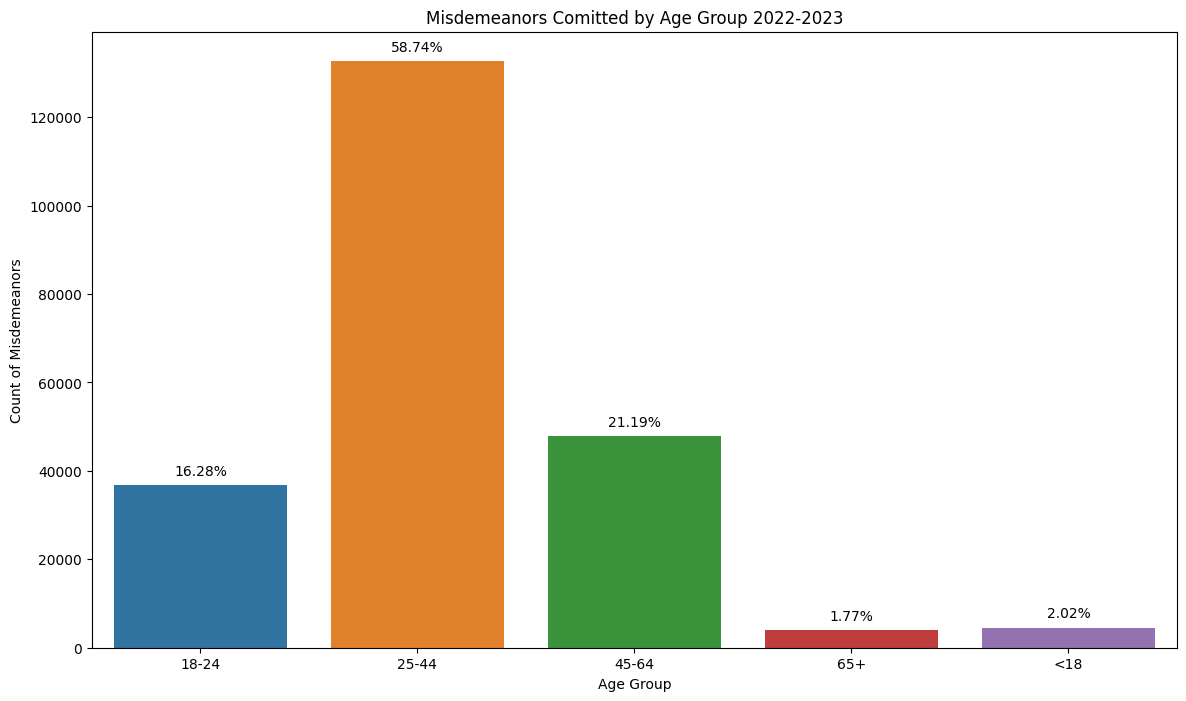

In [63]:
misdemeanor_df = df[df['LAW_CAT_CD']== 'Misdemeanor']
agg_df_2 = misdemeanor_df['AGE_GROUP'].value_counts().reset_index()
agg_df_2.columns = ['AGE_GROUP', 'count']
agg_df_2= agg_df.sort_values(by='AGE_GROUP')
plt.figure(figsize = (14,8))
ax = sns.barplot( data = agg_df_2, x = 'AGE_GROUP',y='count')
ax.set_title('Misdemeanors Comitted by Age Group 2022-2023')
ax.set_xlabel('Age Group')
ax.set_ylabel('Count of Misdemeanors')


for p in ax.patches:
    height = p.get_height()
    percentage = (height/ total_misdemeanors) *100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va = 'bottom', fontsize = 10, color = 'black',
                xytext = (0,5), textcoords = 'offset points')


### Traffic

Text(0, 0.5, 'Count of Traffic Arrests')

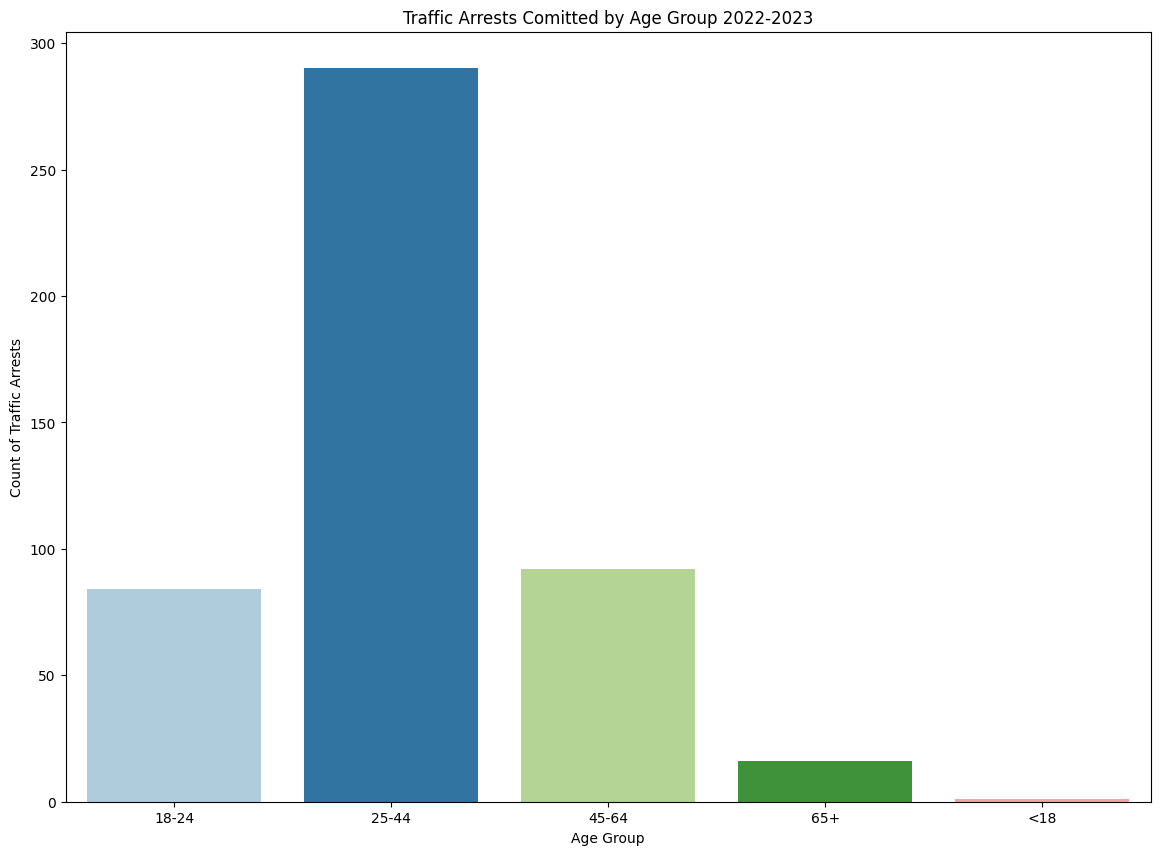

In [76]:
traffic_df = df[df['LAW_CAT_CD'] =='Traffic']
agg_df_3 = traffic_df['AGE_GROUP'].value_counts().reset_index()
agg_df_3.columns = ['AGE_GROUP', 'count']
agg_df_3 = agg_df_3.sort_values('AGE_GROUP')
plt.figure(figsize=(14,10))
ax = sns.barplot(data = agg_df_3, x = 'AGE_GROUP', y ='count',palette='Paired')

for p in ax.patches:
    height = p.get_height()
    percentage = (height/ total_traffic) *100
    ax.annotate = (f'{percentage: .2f}%', (p.get_x() + p.get_width() / 2., height),
                )



ax.set_title('Traffic Arrests Comitted by Age Group 2022-2023')
ax.set_xlabel('Age Group')
ax.set_ylabel('Count of Traffic Arrests')

# Race

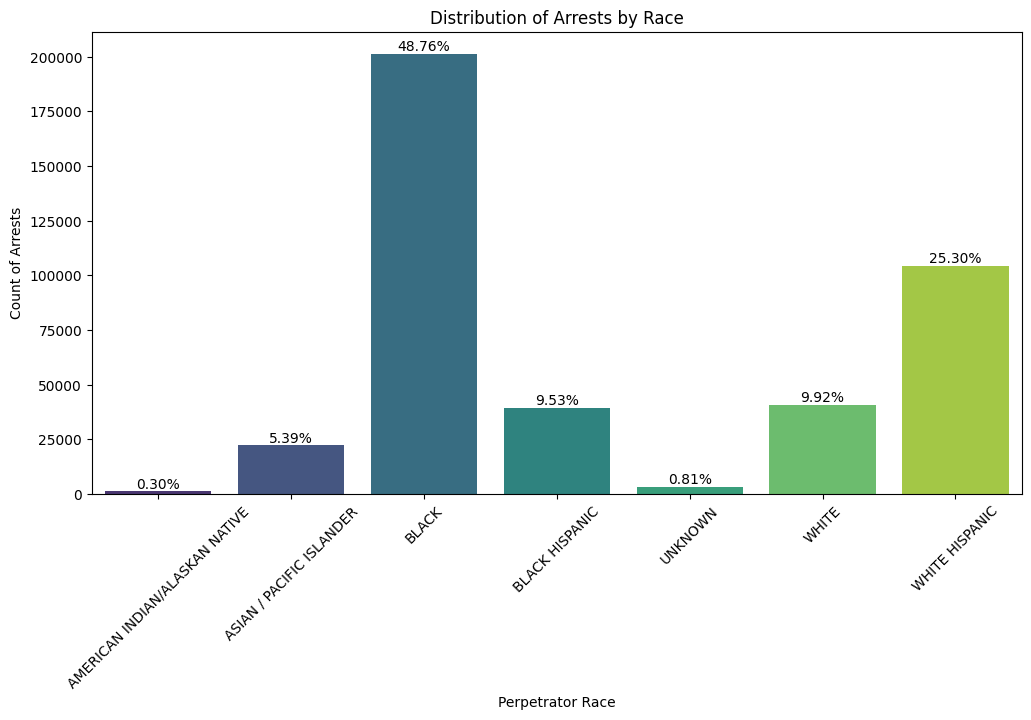

In [30]:
def add_annotations(ax, total_count):
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_count) * 100
        ax.annotate(f'{percentage:.2f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

# Plot arrests by PERP_RACE
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='PERP_RACE', palette='viridis')
total_arrests = len(df)
add_annotations(ax, total_arrests)
plt.title('Distribution of Arrests by Race')
plt.xlabel('Perpetrator Race')
plt.ylabel('Count of Arrests')
plt.xticks(rotation=45)
plt.show()
